In [5]:
#逆矩陣運算
import numpy.linalg as nlg
import numpy as np 
a = np.random.rand(2,2)
a = np.asmatrix(a)
print(a)
ia = nlg.inv(a)
print("a的逆為:\n",ia)


[[0.55829337 0.52152043]
 [0.03058079 0.37254235]]
a的逆為:
 [[ 1.93992645 -2.71569466]
 [-0.15924223  2.90718105]]


In [6]:
#求特徵值跟特徵向量
a=np.array([2,4,3,9,1,4,3,4,2]).reshape(3,3)  
print(a)
eig_value,eig_vector=nlg.eig(a)
print("特征值:",eig_value)
print("特征向量:",eig_vector)

[[2 4 3]
 [9 1 4]
 [3 4 2]]
特征值: [10.48331477 -4.48331477 -1.        ]
特征向量: [[-0.50772731 -0.36224208 -0.28571429]
 [-0.69600716  0.85881392 -0.42857143]
 [-0.50772731 -0.36224208  0.85714286]]


### 实例分析：假设股票收益率服从正态分布，使用numpy产生正态分布随机数，模拟股票收益率，并采用正态分布策略进行交易。

假设有2000只股票，一年股市共250个交易日。一年365天-全民法定节假日=365-每周双休日*52-节日放假日  （国庆3天+春节3天+劳动节、元旦、清明、端午、中秋共11天）=365-104-11=250日,产生2000x500的数组。

In [7]:
stocks = 2000   # 2000支股票
days =  500  # 两年大约500个交易日
# 生成服从正态分布：均值期望＝0，标准差＝1的序列

stock_day = np.random.standard_normal((stocks,days))  
print(stock_day.shape)   #打印数据组结构
# 打印出前五只股票，头五个交易日的涨跌幅情况
print(stock_day[0:5, :5])

(2000, 500)
[[-0.91252038 -0.66711294  0.71824268 -0.09302906 -0.53233205]
 [ 2.29843498 -1.20966238 -0.82590224 -0.87555908 -0.08731341]
 [ 0.39702452 -0.67229099  0.91934745 -0.12031194  0.49302481]
 [ 0.67079435  0.28530004 -0.05967048  1.05258833  0.32809203]
 [ 1.44764516  0.63483607  1.72826476 -1.48190382 -0.78020039]]


## 正態分布買入策略

In [15]:
# 保留后250天的随机数据作为策略验证数据
keep_days = 250
# 统计前250, 切片切出0-250day，days = 500
stock_train_day = stock_day[:,0:days-keep_days]
# 打印出前250天跌幅最大的三支(0~2)，总跌幅通过np.sum计算，np.sort对结果排序
print(np.sort(np.sum(stock_train_day,axis=1))[:3])
# 使用np.argsort针对股票跌幅进行排序，返回序号，即符合买入条件的股票序号
stock_lower = np.argsort(np.sum(stock_train_day,axis=1))[:3]
# 输出符合买入条件的股票序号
stock_lower

[-60.74806742 -46.15393694 -45.76655226]


array([1341,  789, 1394], dtype=int64)

### 封装函数plot_buy_lower()可视化选中的前3只跌幅最大的股票前250天走势以及从第250日买入后的走势

买入第1341只股票，从第250个交易日开始持有盈亏：14.27%
买入第789只股票，从第250个交易日开始持有盈亏：15.20%
买入第1394只股票，从第250个交易日开始持有盈亏：24.86%


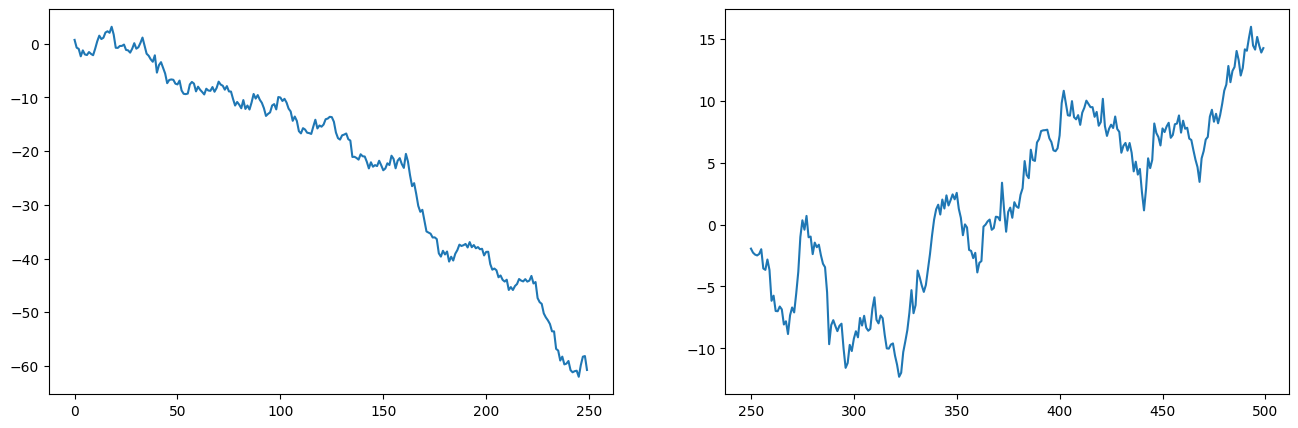

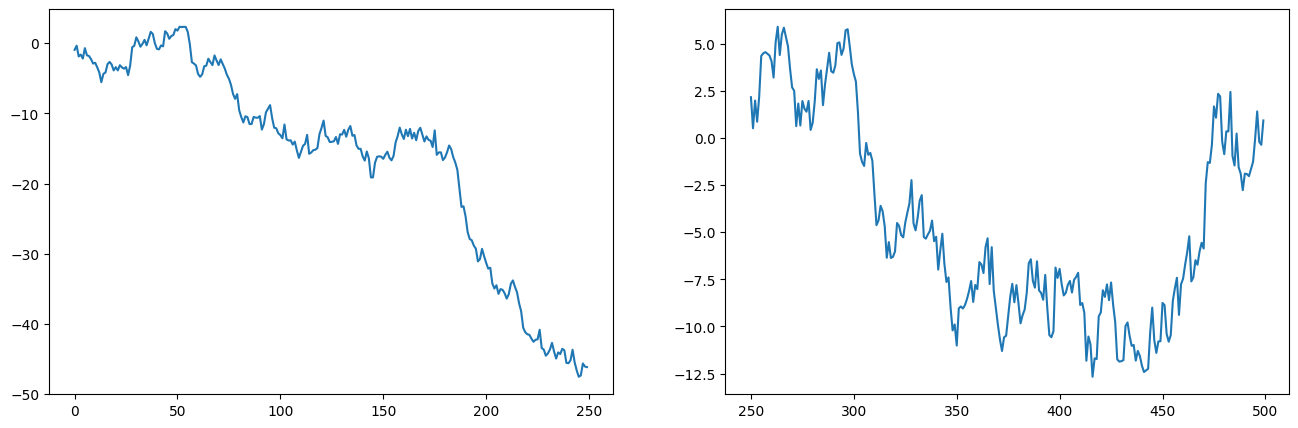

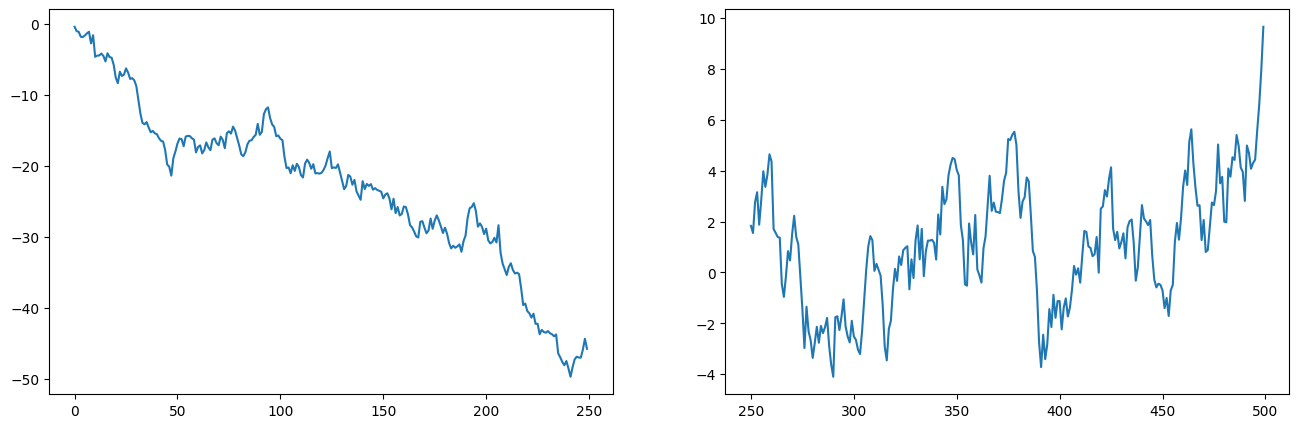

In [19]:
import matplotlib.pyplot as plt  #引入画图库             
#python定义函数使用def 函数名：然后enter
def buy_lower(stock):
    #设置一个一行两列的可视化图表
    #_ 代表忽略 Figure 物件，因為這段程式碼只需要 axs（子圖）
    _,axs = plt.subplots(nrows=1,ncols=2,figsize = (16,5))

    #绘制前450天的股票走势图，np.cumsum():序列连续求和
    axs[0].plot(np.arange(0,days-keep_days),stock_train_day[stock].cumsum())

    #从第250天开始到500天的股票走势
    buy = stock_day[stock][days-keep_days:days].cumsum()
    #绘制从第250天到500天中股票的走势图
    axs[1].plot(np.arange(days-keep_days,days),test)
    #返回从第250天开始到第500天计算盈亏的盈亏序列的最后一个值
    return buy[-1]
#假设等权重地买入3只股票
profit = 0  #盈亏比例
#遍历跌幅最大的3只股票序列序号序列
for stock in stock_lower:
    #profit即三只股票从第250天买入开始计算，直到最后一天的盈亏比例
    profit+=buy_lower(stock)
    print("买入第{}只股票，从第250个交易日开始持有盈亏：{:.2f}%".format(stock,profit))